**Student Score Prediction**

In this problem statement, given the no.of hours studied by each 
student we have to predict the scores obtained by them in the exam.


*   Since there is a prediction involved, it is a Supervised Learning problem.
*   As the no.of hours given are continuous variable, it will be a Simple Regression problem as only 1 feature is involved.



---






***Importing the important libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Loading the dataset***

In [2]:
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


***Data cleaning***

Analysing the data and cleaning them by checking for 

*   Unstructured data
*   Data in wrong format
*   Missing data
*   Duplicates
*   Outliers











In [3]:
data.shape

(25, 2)

There are 25 rows and 2 columns in the dataset.

In [4]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

The columns are in right format.

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no missing values in the dataset.

In [6]:
data = data.drop_duplicates()
data.shape

(25, 2)

There is no duplicates in the dataset.

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


These are the statistical measures of the dataset.

In [8]:
iqr = data.Hours.quantile(0.75) - data.Hours.quantile(0.25)   # IQR = Q3 - Q1
iqr

4.7

Calculating IQR for outlier detection.

In [9]:
upper_threshold = data.Hours.quantile(0.75) + (1.5 * iqr) # Q3 + 1.5IQR
lower_threshold = data.Hours.quantile(0.25) - (1.5 * iqr) # Q1 - 1.5IQR
upper_threshold, lower_threshold

(14.450000000000001, -4.3500000000000005)

Checking the upper threshold and lower threshold for outliers.

There are no outliers in this dataset.

***Exploratory Data Analysis (EDA)***

Plotting the data and trying to understand the patterns and relationships in the data.

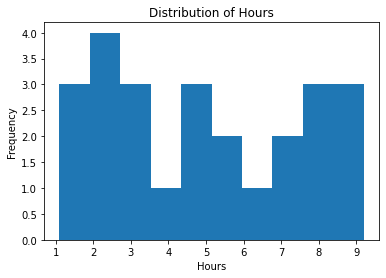

In [10]:
hrs = data['Hours']
plt.hist(hrs)
plt.title('Distribution of Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

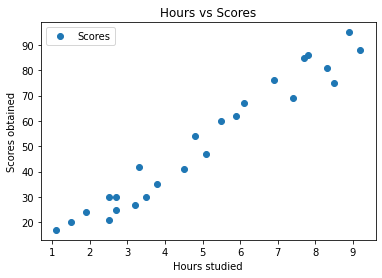

In [11]:
data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores obtained')
plt.show()

In the feature(Hours) vs target(Scores) plot, we can see there is a linear relationship between them. However, we can verify it by checking the correlation between them.

In [12]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


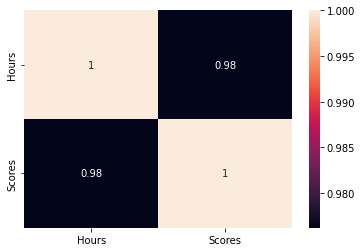

In [13]:
sns.heatmap(data.corr(), annot = True)

From this, we can see that there is a strong positive correlation.

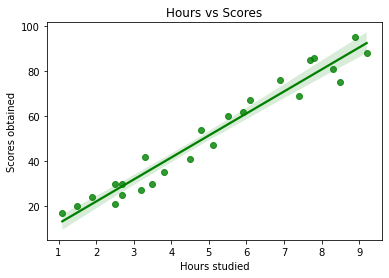

In [14]:
sns.regplot(x = data['Hours'], y = data['Scores'], data = data, color = 'green')
plt.title('Hours vs Scores')
plt.xlabel('Hours studied')
plt.ylabel('Scores obtained')
plt.show()

Plotting a regression plot to confirm the above relationship between feature and target.

***Data preparation***

In [15]:
X = data[['Hours']].values
y = data['Scores'].values

Taking the feature in X variable and the target in y variable.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Splitting the data into train and test. 

*   80% for training
*   20% for testing



In [17]:
X_train.shape, X_test.shape

((20, 1), (5, 1))

***Model training***

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

We've trained the linear regression model using X_train and y_train data.

Our model is  **y = mX + c** where m is the coefficient and c is the intercept.

In [19]:
print(regressor.coef_)
print(regressor.intercept_)

[9.68207815]
2.826892353899737


After training the model, found the accurate values of coefficient(m) and intercept(c).

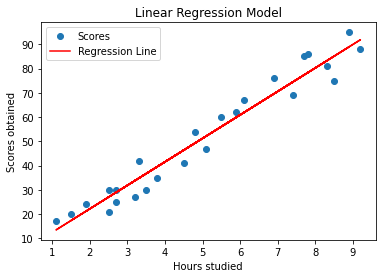

In [20]:
line = (regressor.coef_ * X) + regressor.intercept_
data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.plot(X, line, color = 'red', label = 'Regression Line')
plt.title('Linear Regression Model')
plt.xlabel('Hours studied')
plt.ylabel('Scores obtained')
plt.legend()
plt.show()

As we can see from the plot, our model is trained accurately.

***Prediction***

In [21]:
y_pred = regressor.predict(X_test)

In [22]:
df = pd.DataFrame({'Actual_Score' : y_test, 'Predicted_Score' : y_pred})
df

,Actual_Score,Predicted_Score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


Here, we have compared the predicted values with the original values.

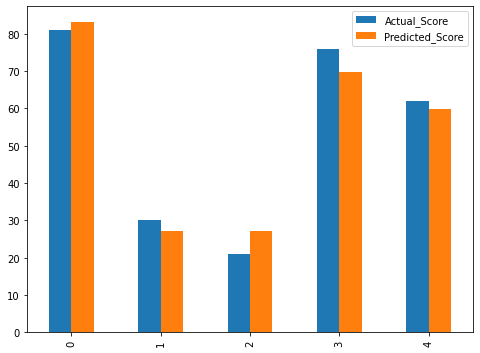

In [23]:
df.plot(kind = 'bar', figsize = (8,6))
plt.show()

As we can see from the graph, our prediction is most accurate.

In [24]:
regressor.predict([[5]])

array([51.23728313])

Testing the model for additional inputs.

In [25]:
regressor.predict([[12]])

array([119.01183021])

This is the case of extrapolation.

***Evaluation of model***

In [26]:
from sklearn import metrics
print('R2 - Score : ', metrics.r2_score(y_test, y_pred))

R2 - Score :  0.9678055545167994


From this, we can see that the R2 - Score value is 0.96 which is very good.

We can say that our model accuracy is 96% which means this is a very good model.
